In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Алгоритм K-means

Алгоритм:\
Шаг 1: Выбираем число кластеров, 𝑘\
Шаг 2: Выбираем 𝑘 случайных значений (точек, центроидов)\
Шаг 3: Создаем 𝑘 кластеров:\
Относим каждую точку к тому кластеру, к центру которого она ближе\
Шаг 4: Вычисляем новый центроид каждого кластера («средняя координата»)\
Шаг 5: Если алгоритм сошелся, то конец, иначе шаг 3. 

In [2]:
# Генерация случайных данных
np.random.seed(42)
data = np.random.randn(100, 2)

# Задание параметров
k = 3
max_iterations = 100


In [3]:
def k_means(data, k, max_iterations):
    
    # Выбор случайных центроидов
    centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]
    
    for _ in range(max_iterations):
        # Вычисление расстояний между точками и центроидами
        distances = np.linalg.norm(data[:, None] - centroids, axis=2)
        
        # Назначение кластеров для каждой точки
        labels = np.argmin(distances, axis=1)
        
        # Обновление центроидов
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Проверка на сходимость
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

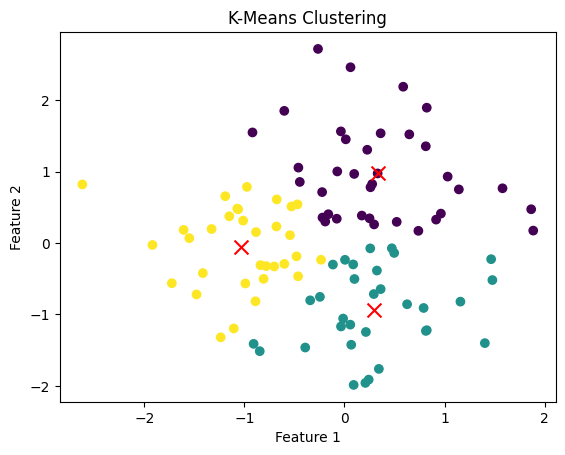

In [4]:
# Применение метода k-means
labels, centroids = k_means(data, k, max_iterations)

# Визуализация результатов
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()